In [21]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import time
import numpy as np
import os
import re

In [22]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.family']='sans-serif'
plt.rcParams['axes.unicode_minus'] = False

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

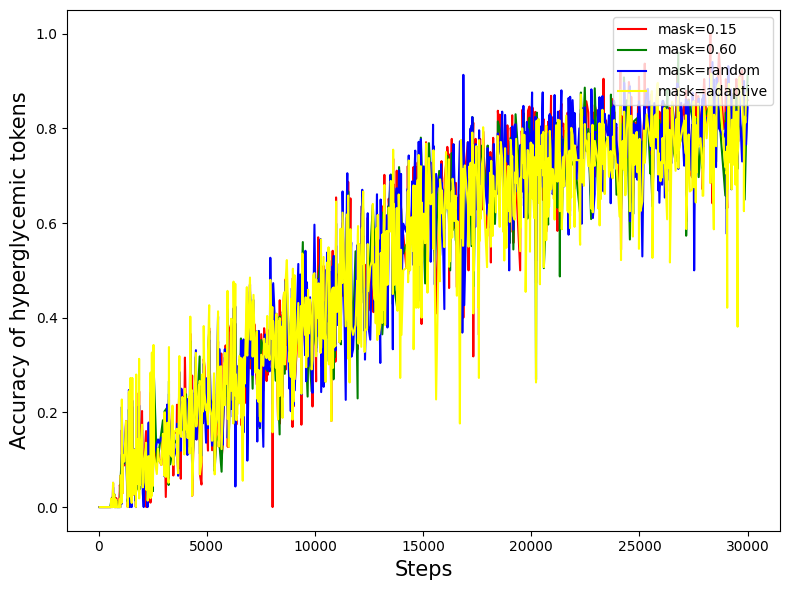

In [57]:
import csv
import matplotlib.pyplot as plt

def read_csv_xy(path):

    exampleFile = open(path, 'r', newline='', encoding='utf-8')
    exampleReader = csv.reader(exampleFile)
    exampleData = list(exampleReader)
    exampleFile.close()
    length_zu = len(exampleData)
    

    x = []
    y = []
    
    for i in range(1, length_zu):
        x.append(int(exampleData[i][1])) 
        y.append(float(exampleData[i][2]))
    
    return x, y

file = '/share/home/liangzhongming/930/CGMformer/pic/train_stage/bs48/'

csv_file_paths = [file + 'mask0.15_180.csv',
                  file + 'mask0.60_180.csv',
                  file + 'random_180.csv',
                  file + 'tfidf_180.csv',
                  ]


plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue', 'yellow']
for i, csv_file_path in enumerate(csv_file_paths):
    x, y = read_csv_xy(csv_file_path)
    
    plt.plot(x, y, color=colors[i])

plt.legend(loc='upper right', labels=['mask=0.15', 'mask=0.60', 'mask=random', 'mask=adaptive'])

plt.xlabel('Steps', fontsize=15)
plt.ylabel('Accuracy of hyperglycemic tokens', fontsize=15)
# plt.title('hidden dimension')
# plt.legend()
plt.tight_layout()
# plt.grid(True)
plt.savefig('/share/home/liangzhongming/930/CGMformer/pic/12_18_bs48_180acc.pdf', format='pdf', dpi=600)

plt.show()


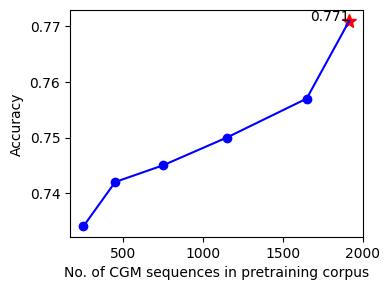

In [3]:
import matplotlib.pyplot as plt


pretraining_data = [250, 450, 750, 1150, 1650, 1917]
accuracy = [0.734, 0.742, 0.745, 0.750, 0.757, 0.771]

# frozen_layers = [0, 1, 2, 3, 4]
# accuracy = [0.756, 0.748, 0.755, 0.745, 0.747]

# strategys = ['concat last two layers + CLS','last layers + CLS' ,'concat last two layers + mean','last layers + mean']
# accuracy = [0.758, 0.757, 0.757, 0.754]

# plt.figure(figsize=(6,12))
plt.figure(figsize=(4,3))
# plt.plot(pretraining_data, accuracy, marker='o', linestyle='-')
plt.plot(pretraining_data[:-1], accuracy[:-1], marker='o', linestyle='-', color='blue')
plt.plot(pretraining_data[-1], accuracy[-1], marker='*', linestyle='-', color='red', markersize=10)
plt.plot(pretraining_data[-2:], accuracy[-2:], linestyle='-', color='blue')


# plt.bar(strategys, accuracy)


plt.xlabel('No. of CGM sequences in pretraining corpus', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)



# for i in range(len(strategys)):
#     plt.text(strategys[i], accuracy[i], f'{accuracy[i]:.3f}', ha='center', va='bottom')

    
# plt.xticks(strategys, rotation=45, ha='right')
# plt.ylim(0.75, 0.76)


# for i in range(len(pretraining_data)):
#     plt.text(pretraining_data[i], accuracy[i], f'{accuracy[i]:.3f}', ha='right')
plt.text(pretraining_data[-1], accuracy[-1], f'{accuracy[-1]:.3f}', ha='right')


# plt.grid(True)
plt.tight_layout()
plt.savefig('/share/home/liangzhongming/930/CGMformer/pic/1218_data_volum.pdf', format='pdf', dpi=600)
plt.show()


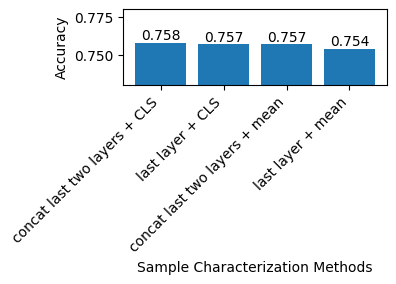

In [20]:
import matplotlib.pyplot as plt

strategies = ['concat last two layers + CLS', 'last layer + CLS', 'concat last two layers + mean', 'last layer + mean']
accuracy = [0.758, 0.757, 0.757, 0.754]

# masks = ['15%', '45%', '60%', 'Random(45%-60%)', 'Adaptive(45%-60%)']
# accuracy = [0.749, 0.754, 0.737, 0.741, 0.752]

# lengths = ['48', '96', '144', '288']
# accuracy = [0.741, 0.749, 0.745, 0.771]

# dims = ['32', '64', '128', '256']
# accuracy = [0.759, 0.775, 0.771, 0.751]

plt.figure(figsize=(4, 3))


# plt.barh(mask, accuracy)


plt.bar(strategies, accuracy)


plt.xlabel('Sample Characterization Methods', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)

# plt.yticks(accuracy, rotation=45, ha='right')


# for i in range(len(lengths)):
#     plt.text(accuracy[i], lengths[i], f'{accuracy[i]:.3f}', va='center', ha='left')

for i in range(len(strategies)):
    plt.text(strategies[i], accuracy[i], f'{accuracy[i]:.3f}', ha='center', va='bottom')


plt.xticks(strategies, rotation=45, ha='right')

plt.ylim(0.73, 0.78)

plt.tight_layout()
plt.savefig('/share/home/liangzhongming/930/CGMformer/pic/12_18_methods.pdf', format='pdf', dpi=600)

plt.show()
